In [128]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
os.environ['CUDA_VISIBLE_DEVICES']='0'
from unet3d import UNet
import tqdm
from torch.utils.data import DataLoader, Dataset, random_split
#from datasets import LiverDatasetRandom, LiverDatasetFixed
import progressbar

#Rotate the 3D tensor and it's corresponding label





from torch.utils.data import Dataset, DataLoader
class LiverDataset(Dataset):
    def __init__(self, filepairlist):
        self.filepairlist = filepairlist
    def __len__(self):
        return len(self.filepairlist)

    def __getitem__(self, idx):
        imgpath, lblpath = self.filepairlist[idx]
        img = np.load(imgpath)
        img = np.float32(img)/128 - 1
        img = img[None,...]
        lbl = np.load(lblpath)
        return {'image' : torch.from_numpy(img), 'label' : torch.from_numpy(lbl).long()}

#litsids = [1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 19, 20, 22, 25, 26, 27, 31, 32, 102, 103, 104, 105, 107, 108]
#litsids = [1]
litsids = [1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 19, 20, 22, 25, 26, 27, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 48, 49, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 83, 85, 86, 87,88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 104, 105, 107, 108, 111, 113, 116, 117, 119, 120, 122, 124, 126, 128, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
data_root = './data/train'
data_files = [os.path.join(data_root, f) for f in os.listdir(data_root)]
img_files = [f for f in data_files if 'input' in f]
img_lbl_pairs = [(f, f.replace('input', 'label')) for f in img_files]
dset = LiverDataset(img_lbl_pairs)
dsetlen = len(dset)
trndset, valdset = random_split(dset, [int(0.9*dsetlen), int(0.1*dsetlen)])
trnloader = DataLoader(trndset, batch_size = 1, shuffle = True, num_workers = 2)
print(len(trnloader))
valloader = DataLoader(valdset, batch_size = 1, shuffle = False, num_workers = 2)
lentrnloader, lenvalloader = len(trnloader), len(valloader)

len(dset)

3465


3850

In [ ]:
def rotate_random(array1,array2):
    import random
    
    temp = random.randint(1,3) 
    z = np.zeros(array1.shape)
    zz = np.zeros(array2.shape)
    
    #Updating the images
    for i in range(z.shape[0]):
        z[i,:,:] = np.rot90(array1[i,:,:], k=temp)
    
    #Updating the labels
    for i in range(zz.shape[0]):
        zz[i,:,:] = np.rot90(array2[i,:,:], k=temp)
        
    return z,zz

def save(array1,array2,index):        
    lid = 129 + index%50
    i = index

    save_dir = 'data/augmented'
    inppname = 'img' + str(lid) + '_input'+str(i)+'.npy'
    tgtpname = 'img' + str(lid) + '_label'+str(i)+'.npy'
    np.save(os.path.join(save_dir, inppname), images)
    np.save(os.path.join(save_dir, tgtpname), labels)
    print("Done")

trniter = iter(trnloader)
for i in range(lentrnloader):
    batch = next(trniter)
    images, labels = batch['image'], batch['label']
    images = images.numpy()
    labels = labels.numpy()
    images = np.squeeze(images, axis=0)
    images = np.squeeze(images, axis=0)
    labels = np.squeeze(labels, axis=0)
    #Rotates the volume and label by the given angle
    images,labels = rotate_random(images,labels)
    #saves the data in the directory
    save(images,labels,i)    


In [147]:
z = np.load('data/augmented/img172_input1943.npy')
zz = np.load('data/augmented/img1_input0.npy')
qq = np.load('data/augmented/img1_label3.npy')
q = np.load('data/augmented/img172_label1943.npy')

In [ ]:
for i in range(22):
    plt.imshow(q[i,:,:], cmap="gray")
    plt.show()
    plt.imshow(qq[i,:,:], cmap="gray")
    plt.show()


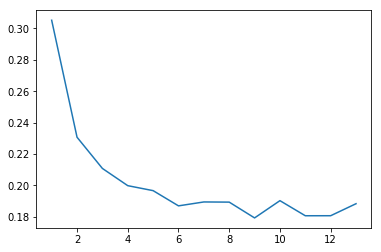

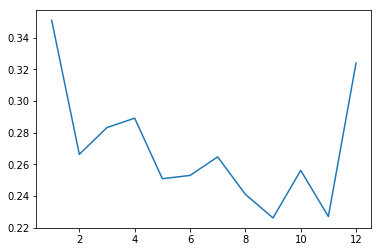

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(13)
t = t+1
loss1 = np.load('loss/loss1_12.npy')
loss2 = np.load('loss/loss2_12.npy')

plt.plot(t,loss1)
plt.show()
plt.plot(t[:12],loss2)
plt.show()

In [3]:
len(loss2)

12